In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore



In [15]:
benin = pd.read_csv(r'C:\Users\dell-67a\solar-challenge-week1\data\benin-malanville_cleaned.csv')
togo = pd.read_csv(r'C:\Users\dell-67a\solar-challenge-week1\data\togo-dapaong_qc_cleaned.csv')
sierra = pd.read_csv(r'C:\Users\dell-67a\solar-challenge-week1\data\sierraleone-bumbuna_cleaned.csv')

benin['Country'] = 'Benin'
togo['Country'] = 'Togo'
sierra['Country'] = 'Sierra Leone'

df_all = pd.concat([benin, togo, sierra], ignore_index=True)


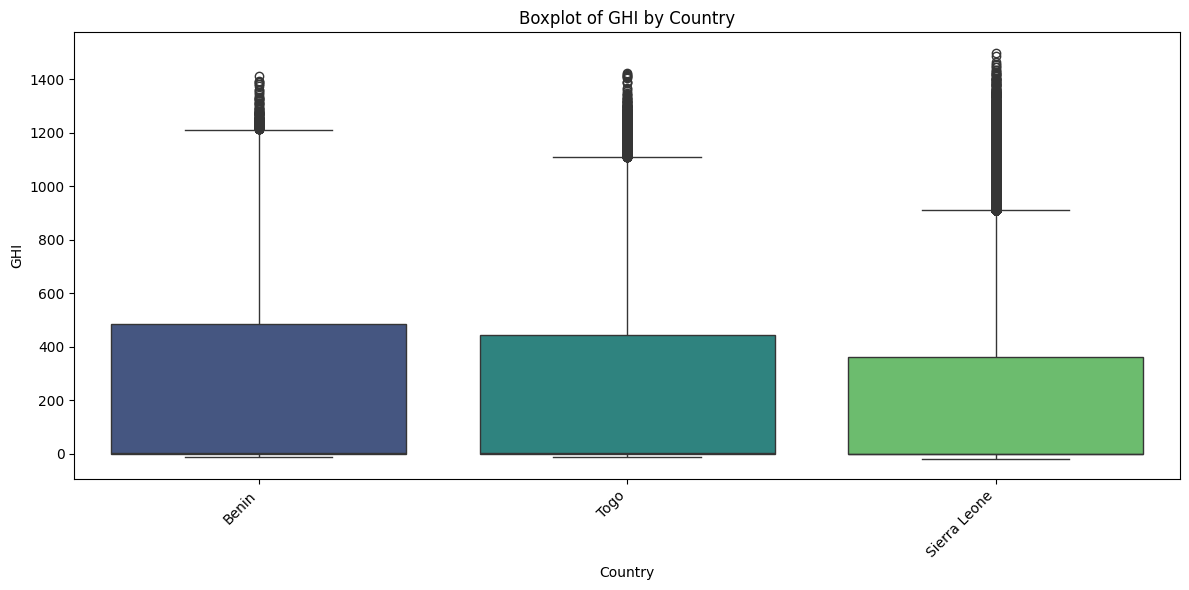

In [16]:
# Boxplot for GHI
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_all, x='Country', y='GHI', hue='Country', palette='viridis')
plt.title('Boxplot of GHI by Country')
plt.xlabel('Country')
plt.ylabel('GHI')
plt.xticks(rotation=45, ha='right') # Rotate labels if country names are long
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

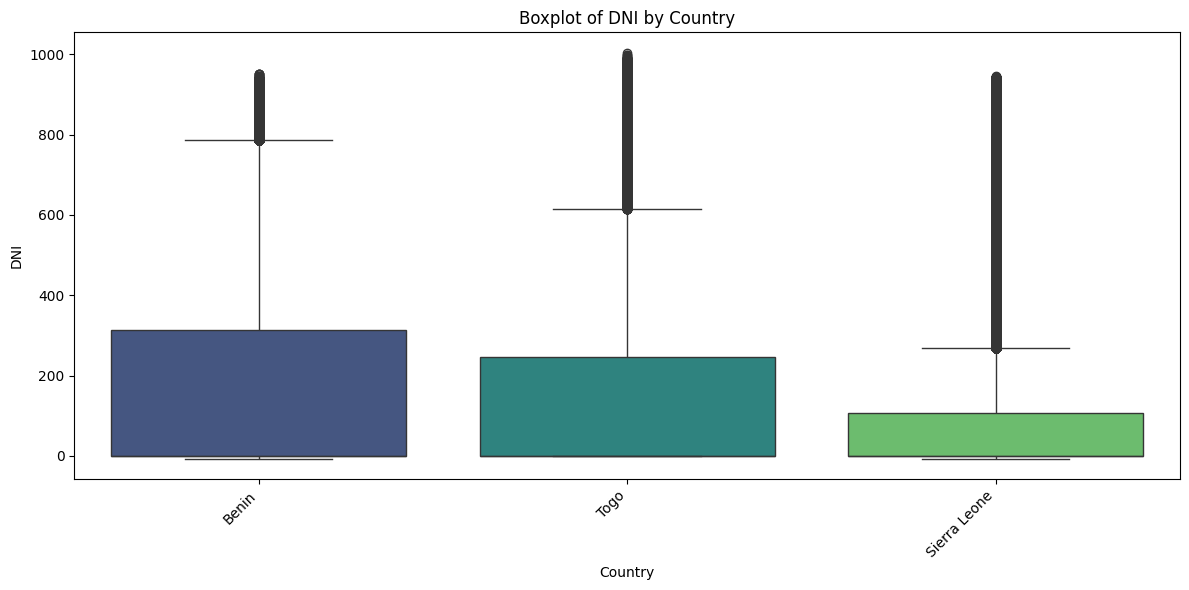

In [10]:
# Boxplot for DNI
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_all, x='Country', y='DNI', hue='Country', palette='viridis')
plt.title('Boxplot of DNI by Country')
plt.xlabel('Country')
plt.ylabel('DNI')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

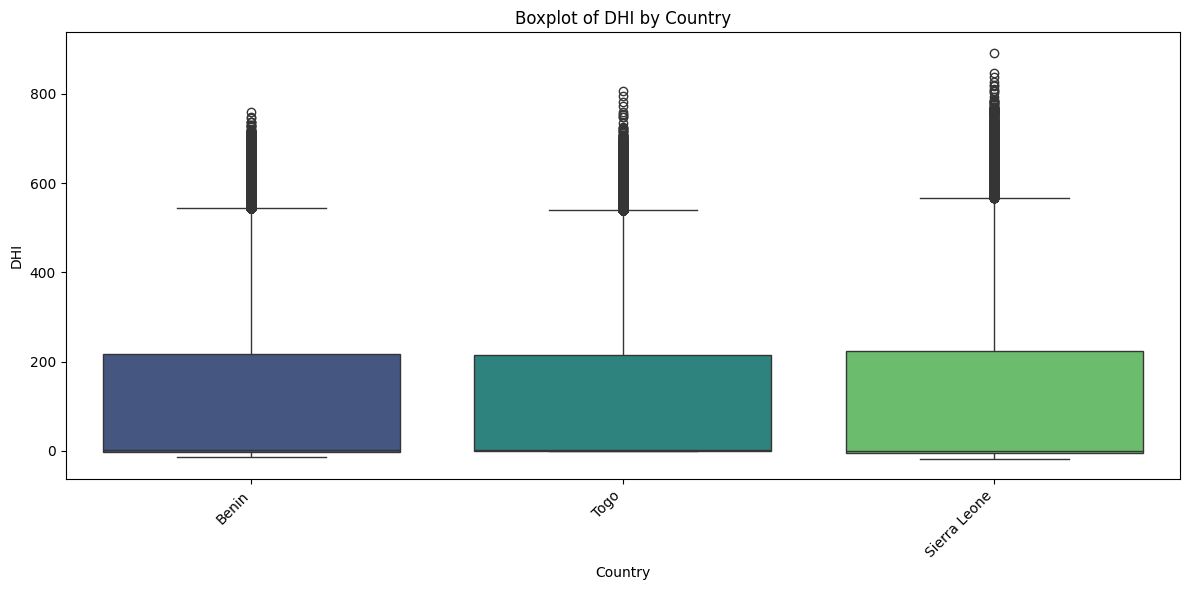

In [11]:
# Boxplot for DHI
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_all, x='Country', y='DHI', hue='Country', palette='viridis')
plt.title('Boxplot of DHI by Country')
plt.xlabel('Country')
plt.ylabel('DHI')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
summary_table = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])

print("Summary Statistics (Mean, Median, Std Dev) by Country:")
print(summary_table)


Summary Statistics (Mean, Median, Std Dev) by Country:
                     GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         240.559452    1.8  331.131327  167.187516   -0.1  261.710501   
Sierra Leone  201.957515    0.3  298.495150  116.376337   -0.1  218.652659   
Togo          230.555040    2.1  322.532347  151.258469    0.0  250.956962   

                     DHI                     
                    mean median         std  
Country                                      
Benin         115.358961    1.6  158.691074  
Sierra Leone  113.720571   -0.1  158.946032  
Togo          116.444352    2.5  156.520714  


In [18]:
country_ghi_data = [df_all['GHI'][df_all['Country'] == country].dropna() for country in df_all['Country'].unique()]


if len(country_ghi_data) > 1: # Need at least two groups to compare
    kruskal_h, kruskal_p = stats.kruskal(*country_ghi_data)

    print(f"Kruskal-Wallis Test for GHI differences between countries:")
    print(f"  Test Statistic (H): {kruskal_h:.4f}")
    print(f"  P-value: {kruskal_p:.4f}")

    alpha = 0.05
    if kruskal_p < alpha:
        print(f"  Result: The p-value ({kruskal_p:.4f}) is less than the significance level ({alpha}). We reject the null hypothesis.")
        print("  Conclusion: There are statistically significant differences in median GHI values between the countries.")
    else:
        print(f"  Result: The p-value ({kruskal_p:.4f}) is greater than the significance level ({alpha}). We fail to reject the null hypothesis.")
        print("  Conclusion: There is no statistically significant difference in median GHI values between the countries based on this test.")

else:
    print("Need data from at least two countries to perform the statistical test.")



Kruskal-Wallis Test for GHI differences between countries:
  Test Statistic (H): 4524.8835
  P-value: 0.0000
  Result: The p-value (0.0000) is less than the significance level (0.05). We reject the null hypothesis.
  Conclusion: There are statistically significant differences in median GHI values between the countries.


In [ ]:

# GHI Variation: Benin exhibits the highest average (mean) and median GHI values, along with the greatest variability (standard deviation).
#Sierra Leone shows the lowest median GHI. 
#The statistical test confirms that these differences in median GHI between the countries are statistically significant.


C:\Users\dell-67a\AppData\Local\Temp\ipykernel_31372\1699876221.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_ghi_per_country.index, y=average_ghi_per_country.values, palette='viridis')


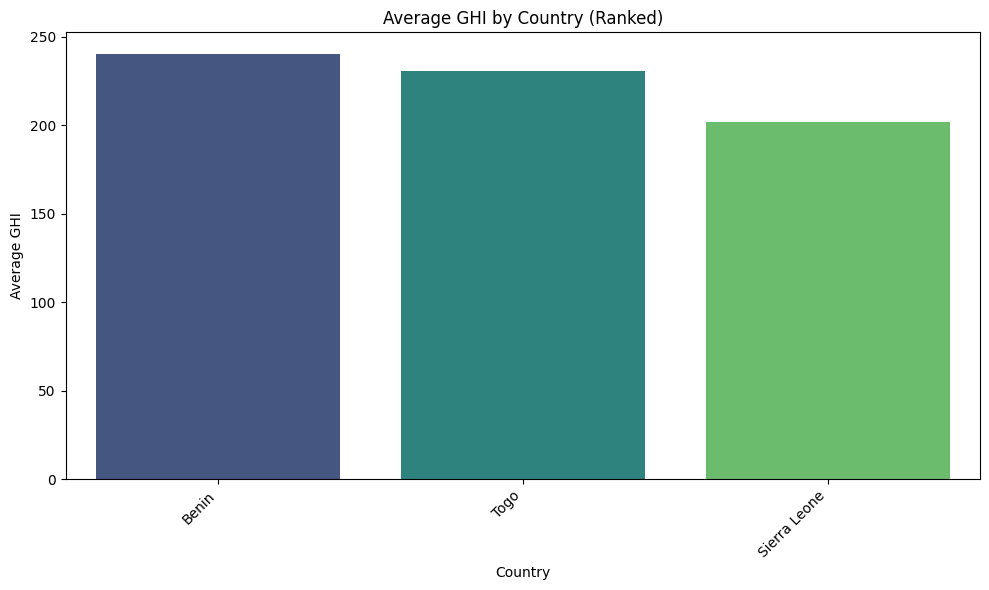

In [20]:
# Calculate average GHI per country
average_ghi_per_country = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=average_ghi_per_country.index, y=average_ghi_per_country.values, palette='viridis')
plt.title('Average GHI by Country (Ranked)')
plt.xlabel('Country')
plt.ylabel('Average GHI')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
